# K - Nearest Neighbours (KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  Convert Categorical into Numerical

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList=['Sex','Embarked']
for feat in objList:
    df[feat] = le.fit_transform(df[feat])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


####  D.V and IDV

In [4]:
df = df.drop(['Name','Ticket','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [5]:
y=df['Pclass']
X=df.drop(['Pclass','PassengerId'],axis=1)

In [6]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [69]:
def diag(matrix,s):
    tot =0
    for i in range(0,s):
        tot=tot+ matrix[i][i]
    return tot

n1=df['Pclass'].count()
n=round(0.3*n1)
n=int(n)
from sklearn import neighbors
arr = [None] * n
for i in range(1,n+1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    acc = knn.fit(X_train,y_train).score(X_test,y_test)
    arr[i-1]=acc
    y_pred = knn.predict(X_test)
    matrix=confusion_matrix(y_test,y_pred)
    s=matrix.shape[0]
    correct_records=diag(matrix,s)
    

Maximum accuracy:- 0.8913857677902621 at K = 1


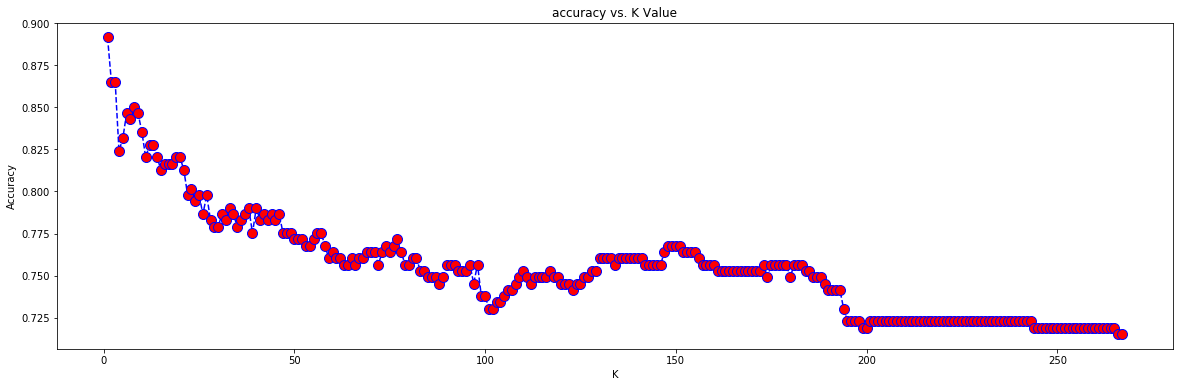

In [72]:
plt.figure(figsize=(20,6))
plt.plot(range(1,n+1),arr,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(arr),"at K =",(arr.index(max(arr)))+1)

In [76]:
k=(arr.index(max(arr)))+1
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train).score(X_test,y_test)
y_pred = knn.predict(X_test)
y_pred
d=pd.DataFrame(y_pred,index=y_test,columns=['y_pred'])
d

,y_pred
Pclass,
3,3
3,3
1,1
1,1
3,2
...,...
3,3
3,3
3,3


In [78]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 62,   6,   2],
       [  3,  37,   9],
       [  1,   8, 139]], dtype=int64)

In [81]:
s=matrix.shape[0]
correct_records=diag(matrix,s)
print("The correctly classified records are:",correct_records) 

The correctly classified records are: 238
